In [ ]:
  import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn import metrics
import warnings

from sklearn.datasets import make_moons
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
filepath = "/content/gdrive/MyDrive/ColabNotebooks/iot23_combined.csv"

In [ ]:
df = pd.read_csv(filepath)

In [ ]:
del df['Unnamed: 0']

In [ ]:
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,2.998796,0.0,0.0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
1,2.998804,0.0,0.0,0.0,3.0,180.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
2,2.999300,0.0,0.0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
3,2.993548,0.0,0.0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
4,2.998807,0.0,0.0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993282,90.034713,3300.0,0.0,0.0,11.0,3608.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
1993283,90.399970,340.0,0.0,0.0,9.0,844.0,0.0,0.0,Benign,1,...,0,0,0,0,0,0,0,0,0,0
1993284,89.824030,72.0,0.0,0.0,3.0,216.0,0.0,0.0,Benign,1,...,0,0,0,0,0,0,0,0,0,0
1993285,45.215915,200.0,0.0,0.0,8.0,648.0,0.0,0.0,Benign,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['label'].value_counts()

PartOfAHorizontalPortScan     1548914
Benign                         229946
Okiru                          100624
DDoS                           100018
C&C                              6572
Attack                           6375
C&C-HeartBeat                     751
C&C-FileDownload                   46
C&C-Torii                          16
FileDownload                       13
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: label, dtype: int64

In [ ]:
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
Y = df['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.15)

In [ ]:
xgb = XGBClassifier(activation = 'relu', random_state=10, max_depth=10)
mlp = MLPClassifier(activation = 'relu', random_state=10, nesterovs_momentum=True, learning_rate='invscaling')
rf=RandomForestClassifier(n_estimators= 100, random_state=10, criterion = 'entropy', max_depth = 8, max_features = 'auto')
#nb = GaussianNB()

In [ ]:
voting_clf = VotingClassifier(
        estimators=[('xgb', xgb), ('mlp', mlp), ('rf', rf)], voting="hard")
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(activation='relu', max_depth=10,
                                            random_state=10)),
                             ('mlp',
                              MLPClassifier(learning_rate='invscaling',
                                            random_state=10)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=8,
                                                     random_state=10))])

In [ ]:
for clf in (xgb, mlp, rf, voting_clf):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))
    warnings.filterwarnings('ignore')
    print("Classifiction Report :")
    print(classification_report(Y_test, y_pred))

XGBClassifier 0.8926199187943571
Classifiction Report :
                            precision    recall  f1-score   support

                    Attack       0.99      1.00      1.00       926
                    Benign       0.97      0.97      0.97     34242
                       C&C       1.00      0.27      0.42      1019
          C&C-FileDownload       0.50      1.00      0.67         3
             C&C-HeartBeat       0.79      0.42      0.55       101
C&C-HeartBeat-FileDownload       1.00      1.00      1.00         1
                 C&C-Torii       1.00      0.50      0.67         2
                      DDoS       0.33      0.00      0.00     14963
              FileDownload       1.00      1.00      1.00         3
                     Okiru       0.73      0.01      0.01     15209
 PartOfAHorizontalPortScan       0.88      1.00      0.94    232525

                  accuracy                           0.89    298994
                 macro avg       0.84      0.65      0.66 

Feature: 0, Score: 0.02597
Feature: 1, Score: 0.02024
Feature: 2, Score: 0.03031
Feature: 3, Score: 0.00024
Feature: 4, Score: 0.33825
Feature: 5, Score: 0.10539
Feature: 6, Score: 0.00660
Feature: 7, Score: 0.00117
Feature: 8, Score: 0.00131
Feature: 9, Score: 0.16410
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00011
Feature: 12, Score: 0.00717
Feature: 13, Score: 0.00094
Feature: 14, Score: 0.00042
Feature: 15, Score: 0.00749
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.20853
Feature: 18, Score: 0.00011
Feature: 19, Score: 0.00052
Feature: 20, Score: 0.07495
Feature: 21, Score: 0.00616
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000


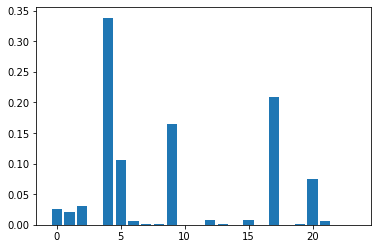

In [ ]:
from sklearn.datasets import make_regression
from matplotlib import pyplot

importance = xgb.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
corr=df.corr()

sns.set(font_scale=2.15)
plt.figure(figsize=(70, 50))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')